In [2]:
import cv2
import numpy as np

mnist = cv2.imread('../datasets/digits.png', 0)
print(mnist.shape)
images = np.array([np.hsplit(row, 100) for row in np.vsplit(mnist, 50)], dtype=np.float32)
print(images.shape)
train_features = images[:, :50].reshape(-1, (20* 20))
test_features = images[:, 50:100].reshape(-1, (20* 20))

k = np.arange(10)
train_labels = np.repeat(k, 250).reshape(-1, 1)
test_labels = train_labels.copy()
knn = cv2.ml.KNearest_create()
knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)
ret, result, neighbors, dist = knn.findNearest(test_features, 3)
matches = np.equal(result, test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuray = (correct * 100.00) / result.size
print('Accuray: {}'.format(accuray))



(1000, 2000)
(50, 100, 20, 20)
Accuray: 91.56


In [1]:
import cv2
import numpy as np

mnist = cv2.imread('../datasets/digits.png', 0)
print(mnist.shape)
images = np.array([np.hsplit(row, 100) for row in np.vsplit(mnist, 50)], dtype=np.float32)
print(images.shape)

train_features = images[:, :50].reshape(-1, (20* 20))
test_features = images[:, 50:100].reshape(-1, (20* 20))


k = np.arange(10)
train_labels = np.repeat(k, 250).reshape(-1, 1)
test_labels = train_labels.copy()
train_features -= np.mean(train_features, axis=0)
test_features -= np.mean(test_features, axis=0)
knn = cv2.ml.KNearest_create()
knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)
ret, result, neighbors, dist = knn.findNearest(test_features, 3)
matches = np.equal(result, test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuray = (correct * 100.00) / result.size
print('Accuray: {}'.format(accuray))



(1000, 2000)
(50, 100, 20, 20)
Accuray: 91.56


In [2]:
import cv2
import numpy as np

mnist = cv2.imread('../datasets/fashion.png', 0)
print(mnist.shape)
images = np.array([np.hsplit(row, 30) for row in np.vsplit(mnist, 30)], dtype=np.float32)
print(images.shape)
train_features = images[:, :15].reshape(-1, (28* 28))
test_features = images[:, 15:30].reshape(-1, (28* 28))


k = np.arange(10)
train_labels = np.repeat(k, 45).reshape(-1, 1)
test_labels = train_labels.copy()
train_features -= np.mean(train_features, axis=0)
test_features -= np.mean(test_features, axis=0)
knn = cv2.ml.KNearest_create()
knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)
ret, result, neighbors, dist = knn.findNearest(test_features, 3)
matches = np.equal(result, test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuray = (correct * 100.00) / result.size
print('Accuray: {}'.format(accuray))

(840, 840)
(30, 30, 28, 28)
Accuray: 71.33333333333333


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#load image
mnist = cv2.imread('../datasets/fashion.png',0)

#shape is in the form of (y,x)
print(mnist.shape)

#get region of interest by splitting the images
images = np.array([np.hsplit(row,30) for row in np.vsplit(mnist,30)], dtype=np.float32)
print(images.shape)

plt.imshow(images[0,22],cmap="gray")

#split images to get half of the image as train then the rest for test
train_features = images[:, :15].reshape(-1,(28*28))

#split the remaining for test
test_feature = images[:, 15:30].reshape(-1,(28 * 28))

print(train_features.shape)

#create labels | k = classes | 
k = np.arange(10)
train_labels = np.repeat(k,45).reshape(-1, 1)
test_labels = train_labels.copy()

#create kNN Model
knn = cv2.ml.KNearest_create()

#train the kNN Model
knn.train(train_features, cv2.ml.ROW_SAMPLE,train_labels)

#using the trained model
ret,result,neighbors, dist = knn.findNearest(test_feature,3)

#check accuracy
matches = np.equal(result,test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct * 100.00)/result.size

print(accuracy) 
 


(840, 840)
(30, 30, 28, 28)
(450, 784)
74.66666666666667


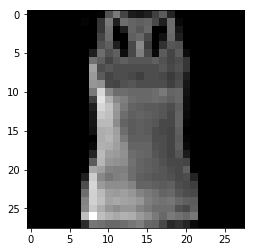

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#load image
mnist = cv2.imread('../datasets/fashion.png',0)

#shape is in the form of (y,x)
print(mnist.shape)

#get region of interest by splitting the images
images = np.array([np.hsplit(row,30) for row in np.vsplit(mnist,30)], dtype=np.float32)
print(images.shape)

plt.imshow(images[0,22],cmap="gray")

#split images to get half of the image as train then the rest for test
train_features = images[:, :15].reshape(-1,(28*28))

#split the remaining for test
test_feature = images[:, 15:30].reshape(-1,(28 * 28))

print(train_features.shape)

#create labels | k = classes | 
k = np.arange(10)
train_labels = np.repeat(k,45).reshape(-1, 1)
test_labels = train_labels.copy()

model = cv2.ml.SVM_create()
model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)
result = model.predict(test_features)


#check accuracy
matches = np.equal(result[1],test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct * 100.00)/result[1].size

print(accuracy) 

In [4]:
import cv2
import numpy as np

mnist = cv2.imread('../datasets/digits.png', 0)
print(mnist.shape)
images = np.array([np.hsplit(row, 100) for row in np.vsplit(mnist, 50)], dtype=np.float32)
print(images.shape)
train_features = images[:, :50].reshape(-1, (20* 20))
test_features = images[:, 50:100].reshape(-1, (20* 20))

k = np.arange(10)
train_labels = np.repeat(k, 250).reshape(-1, 1)
test_labels = train_labels.copy()

model = cv2.ml.SVM_create()
model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)
result = model.predict(test_features)


#check accuracy
matches = np.equal(result[1],test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct * 100.00)/result[1].size

print(accuracy) 

(1000, 2000)
(50, 100, 20, 20)
90.44


(1000, 2000)
(50, 100, 20, 20)


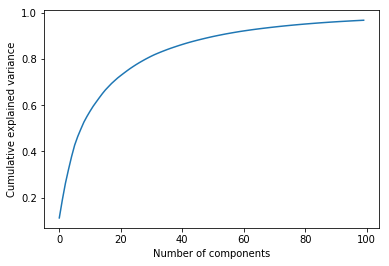

Accuray: 92.28


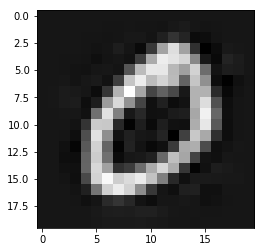

In [4]:
from sklearn.decomposition import PCA
import cv2
import numpy as np
import matplotlib.pyplot as plt


mnist = cv2.imread('../datasets/digits.png', 0)
print(mnist.shape)
images = np.array([np.hsplit(row, 100) for row in np.vsplit(mnist, 50)], dtype=np.float32)
print(images.shape)

pca = PCA(n_components=images.shape[1])



pca = PCA(n_components=100)
train_features = images[:, :50].reshape(-1, (20* 20))
test_features = images[:, 50:100].reshape(-1, (20* 20))
pca.fit(train_features)
train_features = pca.transform(train_features)
test_features = pca.transform(test_features)
train_features.shape, test_features.shape

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

inverse_pca = pca.inverse_transform(train_features)
inverse_pca.shape
plt.imshow(inverse_pca[0].reshape(20,20), cmap='gray')

k = np.arange(10)
train_labels = np.repeat(k, 250).reshape(-1, 1)
test_labels = train_labels.copy()
knn = cv2.ml.KNearest_create()
knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)
ret, result, neighbors, dist = knn.findNearest(test_features, 3)
matches = np.equal(result, test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuray = (correct * 100.00) / result.size
print('Accuray: {}'.format(accuray))


In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

__version__ = '1.0.0'
__author__ = 'Abien Fred Agarap'

import os
import cv2
import timeit
import numpy as np
import tensorflow as tf

camera = cv2.VideoCapture(0)

# Loads label file, strips off carriage return
label_lines = [line.rstrip() for line
               in tf.gfile.GFile('retrained_labels.txt')]

def grabVideoFeed():
    '''Returns camera frame if available, otherwise None'''
    grabbed, frame = camera.read()
    return frame if grabbed else None

def initialSetup():
    '''Loads the retrained MobilNet model'''

    # INFO and WARNING MESSAGES are not printed
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
    
    start_time = timeit.default_timer()

    # This takes 2-5 seconds to run
    # Unpersists graph from file
    with tf.gfile.FastGFile('retrained_graph.pb', 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        tf.import_graph_def(graph_def, name='')

    print('Took {} seconds to unpersist the graph'.format(timeit.default_timer() - start_time))

initialSetup()

with tf.Session() as sess:
    start_time = timeit.default_timer()

    # Feed the image_data as input to the graph and get first prediction
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')

    print('Took {} seconds to feed data to graph'.format(timeit.default_timer() - start_time))

    while True:
        frame = grabVideoFeed()

        if frame is None:
            raise SystemError('Issue grabbing the frame')

        frame = cv2.resize(frame, (224, 224), interpolation=cv2.INTER_CUBIC)

        cv2.imshow('Main', frame)

        # adhere to TS graph input structure
        numpy_frame = np.asarray(frame)
        numpy_frame = cv2.normalize(numpy_frame.astype('float'), None, -0.5, 0.5, cv2.NORM_MINMAX)
        numpy_final = np.expand_dims(numpy_frame, axis=0)

        start_time = timeit.default_timer()

        # This takes 2-5 seconds as well
        predictions = sess.run(softmax_tensor, {'input:0': numpy_final})

        print('Took {} seconds to perform prediction'.format(timeit.default_timer() - start_time))

        start_time = timeit.default_timer()

        # Sort to show labels of first prediction in order of confidence
        top_k = predictions[0].argsort()[-len(predictions[0]):][::-1]

        print('Took {} seconds to sort the predictions'.format(timeit.default_timer() - start_time))

        for node_id in top_k:
            human_string = label_lines[node_id]
            score = predictions[0][node_id]
            print('%s (score = %.5f)' % (human_string, score))

        print('********* Session Ended *********')

        if cv2.waitKey(1) & 0xFF == ord('q'):
            sess.close()
            break

camera.release()
cv2.destroyAllWindows()